## Library Imports

In [12]:
import pandas as pd
import gdown
import os
import json
import matplotlib.pyplot as plt


## Variables

In [13]:
TRAIN_JSON_URL = "https://drive.google.com/file/d/1flMO-Y42FLe1qEzOqgjg591Cvz5hEdGh/view?usp=drive_link"
TEST_JSON_URL = "https://drive.google.com/file/d/10_oiLZzgQNesdXOe2WQ61PnT9qan8aAE/view?usp=drive_link"
VALIDATE_JSON_URL = "https://drive.google.com/file/d/1X9JU3_-eqSBaT_XxE2LfxOL7RpvoK01w/view?usp=drive_link"

TRAIN_JSON_LIST = [TRAIN_JSON_URL, "train.json"]
TEST_JSON_LIST = [TEST_JSON_URL, "test.json"]
VALIDATE_JSON_LIST = [VALIDATE_JSON_URL, "validate.json"]

FOLDERS = [
    "JSON Files",
    "CSV Files"
]

## Dataset

### Dataset Download

In [14]:
def create_required_folders(folders):
    for folder in folders:
        os.makedirs(folder, exist_ok=True)


def download_json_googledrive(data_list=None, folder_name="JSON Files"):
    if data_list is None:
        raise ValueError("data_list cannot be None. Expected a list like: [google_drive_url, output_filename].")
    if len(data_list) != 2:
        raise ValueError("data_list must contain exactly two items: [google_drive_url, output_filename].")

    output_path = os.path.join(folder_name, data_list[1])

    if not os.path.exists(output_path):
        print(f"File '{data_list[1]}' is not downloaded")
        print("Downloading from google drive....")
        gdown.download(data_list[0], output=output_path, fuzzy=True)
    else:
        print(f"File '{data_list[1]}' exists. Will not be downloaded from google drive")

    return output_path



train_path = download_json_googledrive(TRAIN_JSON_LIST)
test_path = download_json_googledrive(TEST_JSON_LIST)
validate_path = download_json_googledrive(VALIDATE_JSON_LIST)


create_required_folders(FOLDERS)



File 'train.json' exists. Will not be downloaded from google drive
File 'test.json' exists. Will not be downloaded from google drive
File 'validate.json' exists. Will not be downloaded from google drive


### JSON to Dataframe

In [15]:
def json_to_pandas(json_file, save_to_csv=False, csv_folder="CSV Files"):
    try:
        with open(json_file, "r", encoding="utf-8") as file:
            data = json.load(file)

        if isinstance(data, dict):
            data = [data]

        df = pd.DataFrame(data)

    except json.JSONDecodeError:
        records = []
        with open(json_file, "r", encoding="utf-8") as file:
            for line in file:
                line = line.strip()
                if line:
                    records.append(json.loads(line))
        df = pd.DataFrame(records)

    if save_to_csv:
        csv_name = f"{os.path.splitext(os.path.basename(json_file))[0]}.csv"
        csv_path = os.path.join(csv_folder, csv_name)

        if not os.path.exists(csv_path):
            print(f"Creating csv file for {json_file}...")
            df.to_csv(csv_path, index=False)
            print(f"Created a csv to '{csv_path}' for '{json_file}'")
        else:
            print(f"csv file for {json_file} already exists at {csv_path}")

    return df



def merge_data(df_list, save_to_csv=False, csv_folder="CSV Files"):
    for df in df_list:
        if 'triple' in df.columns:
            df['triple'] = df['triple'].apply(lambda x: tuple(x) if isinstance(x, list) else x)

    df_all = pd.concat(df_list, ignore_index=True)
    df_all = df_all.drop_duplicates()

    if save_to_csv:
        csv_path = os.path.join(csv_folder, "full_data.csv")

        if not os.path.exists(csv_path):
            df_all.to_csv(csv_path, index=False)
            print("Created a merged csv file")
        else:
            print(f"csv file already exists at {csv_path}")

    return df_all



df_train = json_to_pandas(train_path, save_to_csv=True)
df_test = json_to_pandas(test_path, save_to_csv=True)
df_validate = json_to_pandas(validate_path, save_to_csv=True)

df_list = [df_train, df_test, df_validate]

df = merge_data(df_list=df_list, save_to_csv=True)



csv file for JSON Files\train.json already exists at CSV Files\train.csv
csv file for JSON Files\test.json already exists at CSV Files\test.csv
csv file for JSON Files\validate.json already exists at CSV Files\validate.csv
csv file already exists at CSV Files\full_data.csv


### Data Analysis

### Unique Values Checker

In [16]:
def df_unique_values(df, MAX_VALUES=10, col=None):

    print("\n================== UNIQUE VALUES REPORT ==================\n")

    if col is not None:
        if col not in df.columns:
            print(f"Column '{col}' does not exist in the DataFrame.")
            return
        
        unique_vals = df[col].unique()
        num_unique = len(unique_vals)

        print(f"Column Name: {col}")

        if num_unique > MAX_VALUES:
            print(f"  Unique Values ({num_unique} total): showing first {MAX_VALUES}")
            print(f"  {list(unique_vals[:MAX_VALUES])}")
        else:
            print(f"  Unique Values ({num_unique} total):")
            print(f"  {unique_vals}")

        print("\n  Value Counts:")
        print(df[col].value_counts().head(MAX_VALUES))

        print("\n====================== END REPORT ======================\n")
        return
    
    for col in df.columns:
        print(f"Column Name: {col}")
        unique_vals = df[col].unique()
        num_unique = len(unique_vals)

        if num_unique > MAX_VALUES:
            print(f"  Unique Values ({num_unique} total): showing first {MAX_VALUES}")
            print(f"  {list(unique_vals[:MAX_VALUES])}")
        else:
            print(f"  Unique Values ({num_unique} total):")
            print(f"  {unique_vals}")

        print("\n  Value Counts:")
        print(df[col].value_counts().head(MAX_VALUES))
        print("\n--------------------------------------------------------------\n")

    print("========================== END REPORT =========================\n")


In [17]:
df_unique_values(df)


================== UNIQUE VALUES REPORT ==================

Column Name: img_id
  Unique Values (642 total): showing first 10
  [np.int64(1), np.int64(100), np.int64(101), np.int64(104), np.int64(107), np.int64(108), np.int64(109), np.int64(11), np.int64(110), np.int64(111)]

  Value Counts:
img_id
250    41
246    39
212    38
229    38
233    38
284    38
268    38
230    37
237    37
234    37
Name: count, dtype: int64

--------------------------------------------------------------

Column Name: img_name
  Unique Values (642 total): showing first 10
  ['xmlab1/source.jpg', 'xmlab100/source.jpg', 'xmlab101/source.jpg', 'xmlab104/source.jpg', 'xmlab107/source.jpg', 'xmlab108/source.jpg', 'xmlab109/source.jpg', 'xmlab11/source.jpg', 'xmlab110/source.jpg', 'xmlab111/source.jpg']

  Value Counts:
img_name
xmlab250/source.jpg    41
xmlab246/source.jpg    39
xmlab212/source.jpg    38
xmlab229/source.jpg    38
xmlab233/source.jpg    38
xmlab284/source.jpg    38
xmlab268/source.jpg    38
xm

In [18]:
df_unique_values(df, col="content_type")



================== UNIQUE VALUES REPORT ==================

Column Name: content_type
  Unique Values (10 total):
  ['Modality' 'Position' 'Organ' 'Size' 'Abnormality' 'Quantity' 'Plane'
 'Shape' 'Color' 'KG']

  Value Counts:
content_type
Organ          3560
Position       2426
Abnormality    1995
KG             1740
Modality       1522
Size            892
Plane           740
Quantity        635
Color           397
Shape           121
Name: count, dtype: int64

====================== END REPORT ======================



### Data Distribution

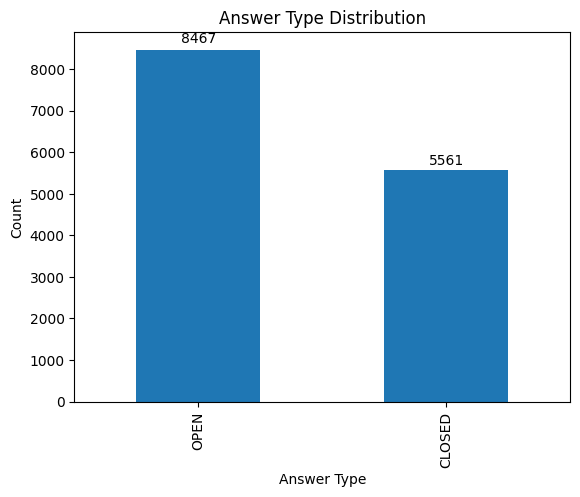

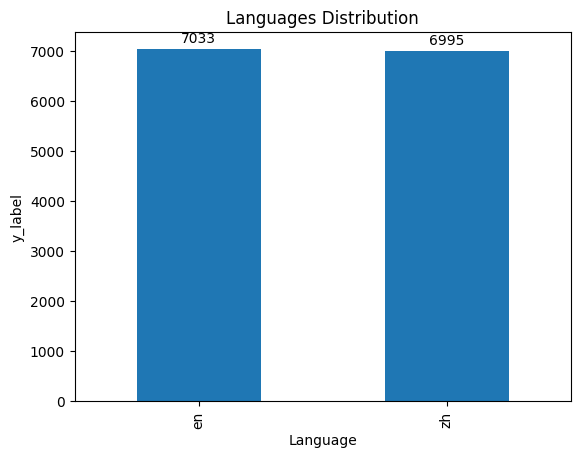

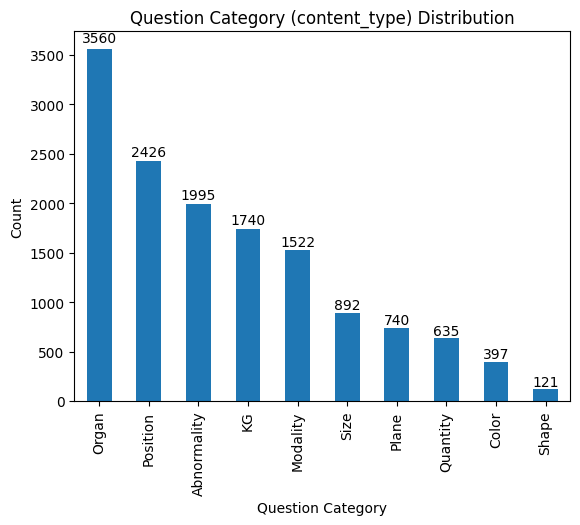

In [19]:
def savefig(directory):
    plt.savefig(directory)

def plot_distribution(df, col = None, x_label = "x_label", y_label = "y_label", title = "title", display_counts = True):
    counts = df[col].value_counts()

    plt.figure()
    ax = counts.plot(kind="bar")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    if display_counts:
        # Add counts on bars
        for i, v in enumerate(counts.values):
            ax.text(i, v + (0.01 * v), str(v), ha='center', va='bottom')

    plt.show()


def run_plot_distribution(df):
    plot_distribution(df, col = "answer_type", x_label = "Answer Type", y_label = "Count", title = "Answer Type Distribution")
    plot_distribution(df, col= "q_lang", x_label= "Language", title= "Languages Distribution")
    plot_distribution(df, col= "content_type", x_label="Question Category",y_label="Count", title = "Question Category (content_type) Distribution")


run_plot_distribution(df)



### Data Groupby

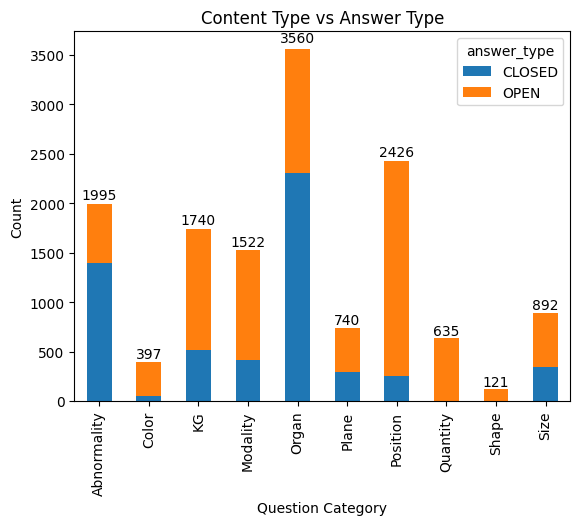


Breakdown Table:
answer_type   CLOSED  OPEN
content_type              
Abnormality     1392   603
Color             47   350
KG               515  1225
Modality         414  1108
Organ           2308  1252
Plane            290   450
Position         248  2178
Quantity           0   635
Shape              0   121
Size             347   545

--------------------------------------------



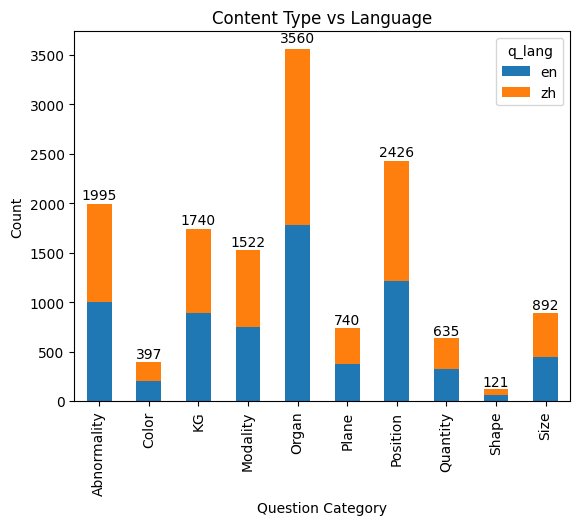


Breakdown Table:
q_lang          en    zh
content_type            
Abnormality    998   997
Color          202   195
KG             885   855
Modality       752   770
Organ         1776  1784
Plane          369   371
Position      1216  1210
Quantity       328   307
Shape           60    61
Size           447   445

--------------------------------------------



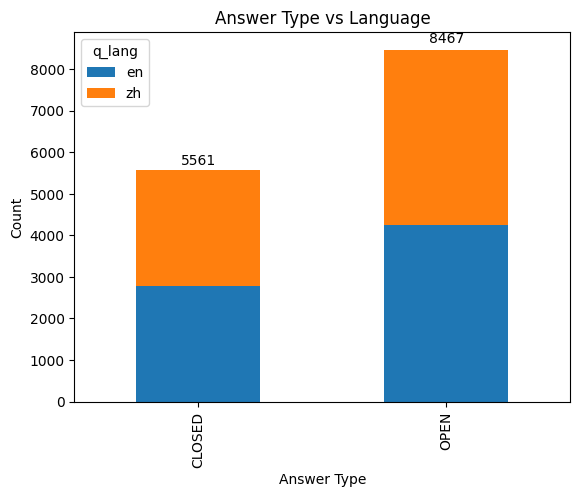


Breakdown Table:
q_lang         en    zh
answer_type            
CLOSED       2781  2780
OPEN         4252  4215

--------------------------------------------



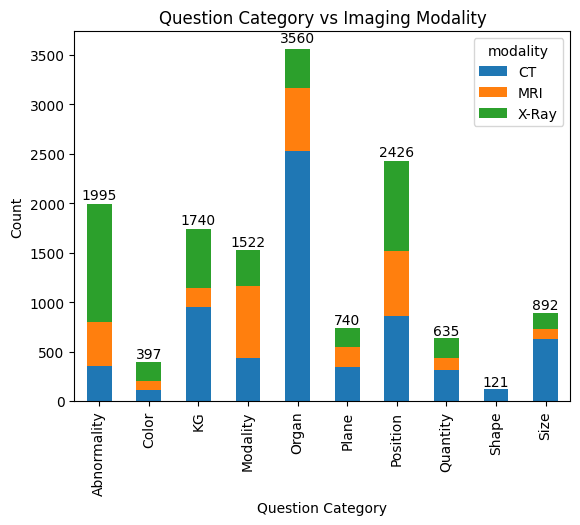


Breakdown Table:
modality        CT  MRI  X-Ray
content_type                  
Abnormality    349  447   1199
Color          116   83    198
KG             948  198    594
Modality       436  728    358
Organ         2530  634    396
Plane          340  202    198
Position       862  651    913
Quantity       312  125    198
Shape          121    0      0
Size           625  107    160

--------------------------------------------



In [20]:
def plot_grouped_stacked_bar(df, groupby_cols, x_label = "x_label", y_label = "y_label", title = "title", display_counts = True):
    cross = df.groupby(groupby_cols).size().unstack(fill_value=0)


    ax = cross.plot(kind="bar", stacked=True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    if display_counts:
        # Add labels on top of stacked bars
        for i, row in enumerate(cross.values):
            total = sum(row)
            ax.text(i, total + (0.01 * total), str(total), ha='center', va='bottom')

    plt.show()

    print("\nBreakdown Table:")
    print(cross)
    print("\n--------------------------------------------\n")

def run_plot_grouped_stacked_bar(df):
    plot_grouped_stacked_bar(df, groupby_cols = ["content_type", "answer_type"], 
                            x_label = "Question Category", 
                            y_label = "Count", 
                            title = "Content Type vs Answer Type")

    plot_grouped_stacked_bar(df, groupby_cols = ["content_type", "q_lang"],
                            x_label = "Question Category",
                            y_label = "Count",
                            title = "Content Type vs Language")

    plot_grouped_stacked_bar(df, groupby_cols = ["answer_type", "q_lang"],
                            x_label = "Answer Type",
                            y_label = "Count",
                            title = "Answer Type vs Language")

    plot_grouped_stacked_bar(df, groupby_cols = ["content_type", "modality"],
                            x_label = "Question Category",
                            y_label = "Count",
                            title = "Question Category vs Imaging Modality")
    

run_plot_grouped_stacked_bar(df)



### Target Rows Removed

In [21]:
def drop_rows(df, col_to_drop, target, save_to_csv = True, csv_file = "Updated_full_data.csv", csv_folder = "CSV Files"):
    df_filtered = df[df[col_to_drop] != target]

    if save_to_csv:
        if not os.path.exists(csv_folder):
            os.makedirs(csv_folder)

        csv_path = os.path.join(csv_folder, csv_file)

        if not os.path.exists(csv_path):
            df_filtered.to_csv(csv_path, index=False)
            print(f"New csv file name {csv_file}")
        else:
            print(f"csv file already exists at {csv_path}")

    return df_filtered


df_en = drop_rows(df,"q_lang", "zh", csv_file="full_data_en.csv")
df_closed = drop_rows(df_en, "answer_type", "OPEN", csv_file= "CLOSED_data_en.csv")
df_open = drop_rows(df_en, "answer_type", "CLOSED", csv_file = "OPEN_data_en.csv")




csv file already exists at CSV Files\full_data_en.csv
New csv file name CLOSED_data_en.csv
csv file already exists at CSV Files\OPEN_data_en.csv


### Post Row Removal Data Analysis

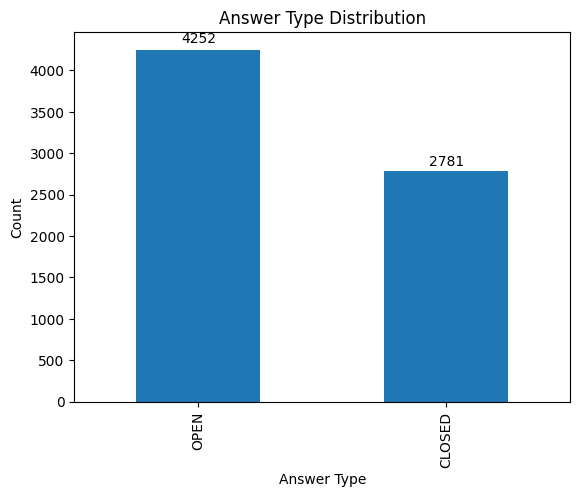

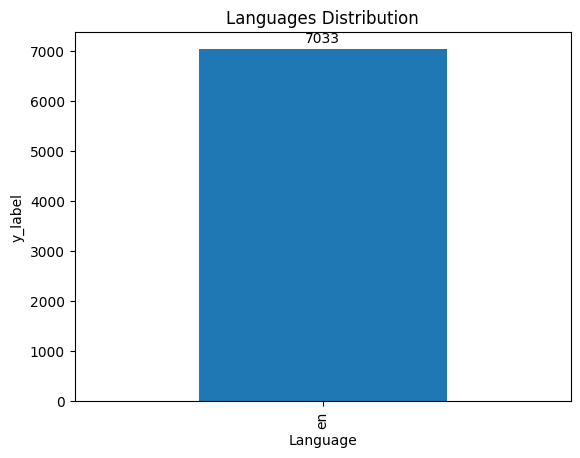

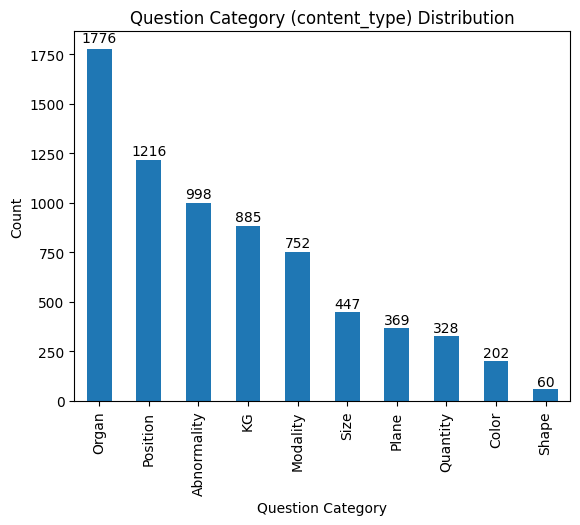

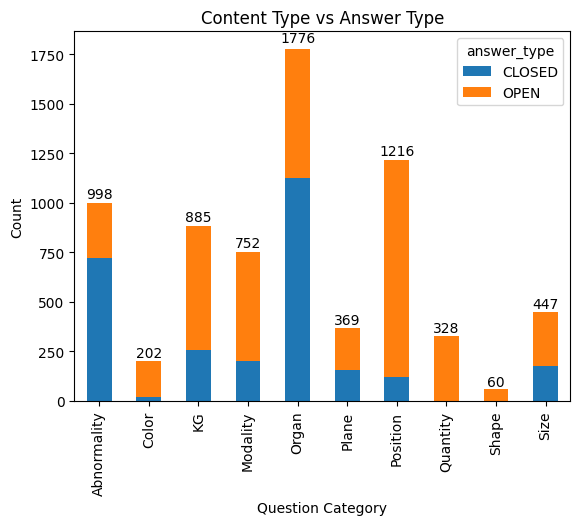


Breakdown Table:
answer_type   CLOSED  OPEN
content_type              
Abnormality      723   275
Color             20   182
KG               255   630
Modality         201   551
Organ           1126   650
Plane            158   211
Position         122  1094
Quantity           0   328
Shape              0    60
Size             176   271

--------------------------------------------



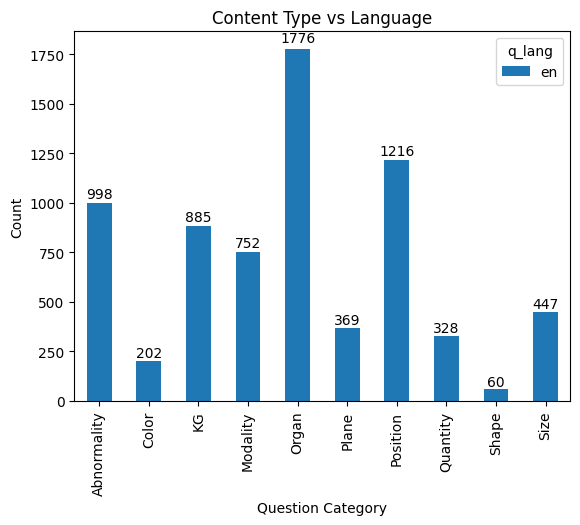


Breakdown Table:
q_lang          en
content_type      
Abnormality    998
Color          202
KG             885
Modality       752
Organ         1776
Plane          369
Position      1216
Quantity       328
Shape           60
Size           447

--------------------------------------------



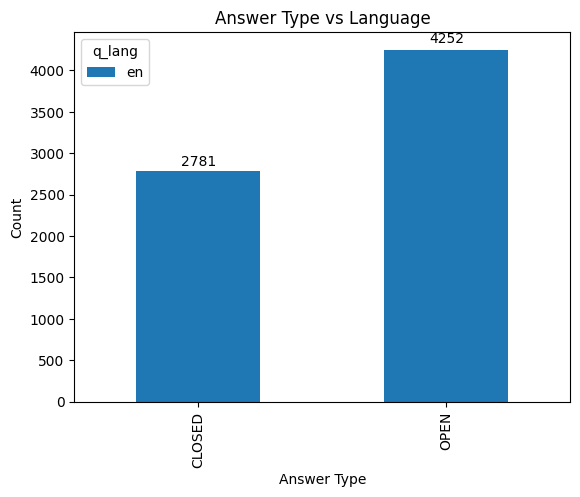


Breakdown Table:
q_lang         en
answer_type      
CLOSED       2781
OPEN         4252

--------------------------------------------



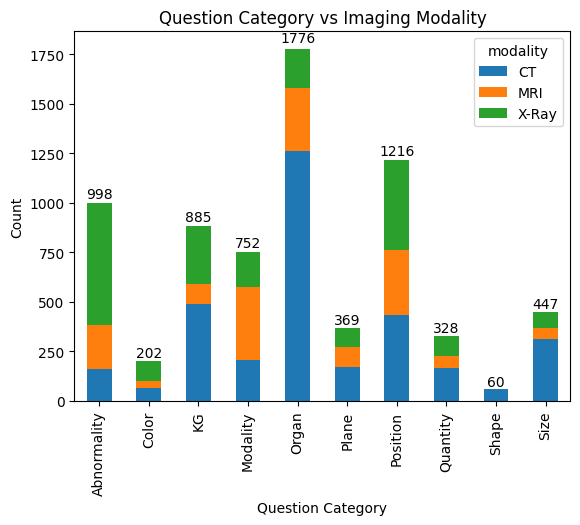


Breakdown Table:
modality        CT  MRI  X-Ray
content_type                  
Abnormality    160  223    615
Color           63   40     99
KG             489   99    297
Modality       208  365    179
Organ         1260  318    198
Plane          169  101     99
Position       433  327    456
Quantity       165   64     99
Shape           60    0      0
Size           314   53     80

--------------------------------------------



In [22]:
run_plot_distribution(df = df_en)
run_plot_grouped_stacked_bar(df = df_en)